# ANÁLISE DINÂMICA DE PÓRTICO ESPACIAL
## SUBMETIDO À EXCITAÇÃO SÍSMICA  
MARCOS WILSON OGATA | Eng. Civil | UFRGS | 2020

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import pandas as pd
import Dynas as dyn 

Primeiramente foi modelado o edifício em software CAD. Cada pilar parede, por possuir dimensão considerável, foi modelado com mais barras verticais, com seções compatíveis com a discretização. Estas barras, para cada pilar, foram unidas entre si por barras horizontais de rigidez virtualmente infinita, a fim de que esta região se comporte de forma única. Após esta modelagem, importou-se o arquivo .dxf no SAP2000, onde se extraíram as coordenadas e conectividades de cada elemento, bem como as seções do mesmo. 

Os dados de sismo foram modelados externamente, utilizando os dados da estação 1 de Yerba Island. Foram modelados um sismo real, com base em acelerações medidas, e um sismo artificial, modelado com um espectro de Kanai-Tajimi.

Foi elaborado a biblioteca de métodos **Dynas.py**. Este módulo possui funções voltadas pra solução de problemas dinâmicos de múltiplos graus de liberdade. Na versão atual possui apenas para sistemas lineares. Esta rotina deve ser chamada antes de rodar todas as outras subrotinas, para o bom funcionamento dos programas.

Com os dados de entrada obtidos, rodam-se as rotinas **sismo_real.py** e **sismo_artificial.py**, que basicamente fazem um tratamento dos dados, resultando em tabelas de aceleração, para montagem do vetor de cargas ao longo do tempo da excitação. Em um segundo momento, roda-se a rotina **estrutura_edificio_forcas.py**, para obter os vetores de carga, ao longo do tempo, para o sismo artificial e o real. 

Por último, utilizou-se a rotina **estrutura_edificio_deslocamentos.py**, para obter os deslocamentos, acelerações e velocidades, ao longo do tempo de duração da análise. Os resultados gerarm diversas planilhas eletrônicas, cujos dados foram devidamente tratados, para melhor esclarecimento. 

In [2]:
#################################
###       ANÁLISE MODAL       ###
#################################

# Lista de graus de liberdade restringidos

Restrictions = np.arange(144)

# Montando as Matrizes de Rigidez e de Massa

K, M = dyn.Matrix3D('dados.xlsx',216)
Kr, Mr = dyn.Restr(K, M, Restrictions)

fk, wk, Phi = dyn.modal_analysis(Kr, Mr, 4)

1 ª Frequência Natural = 2.44Hz 

2 ª Frequência Natural = 2.58Hz 

3 ª Frequência Natural = 3.19Hz 

4 ª Frequência Natural = 7.53Hz 



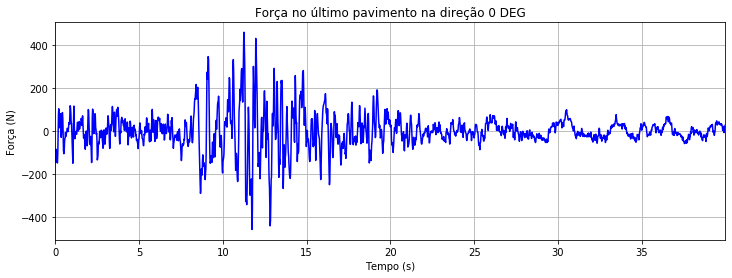

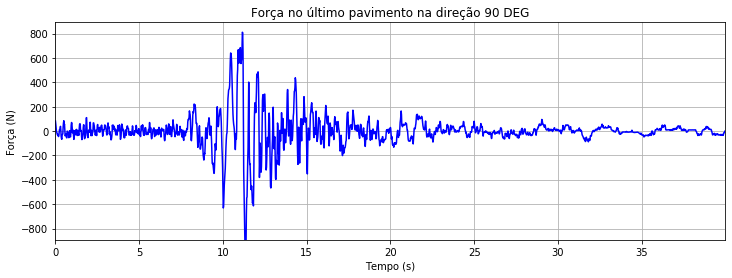

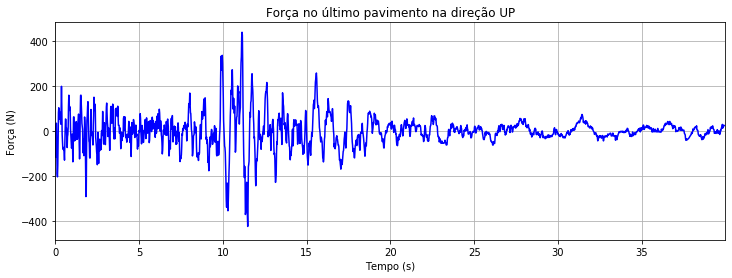

In [3]:
#################################
###      CARGAS DE SISMO      ###
#################################

# Os arquivos de entrada de dados estão em cm/s/s. É necessário converter pra m/s/s

# Obtendo a carga de sismo real

sismo_real = pd.read_excel('sismo_real.xlsx').to_numpy()/100
t = np.linspace(0,39.98,num=2000)
F = dyn.Seismic3D('forca_sismo_real',Mr,sismo_real,t)

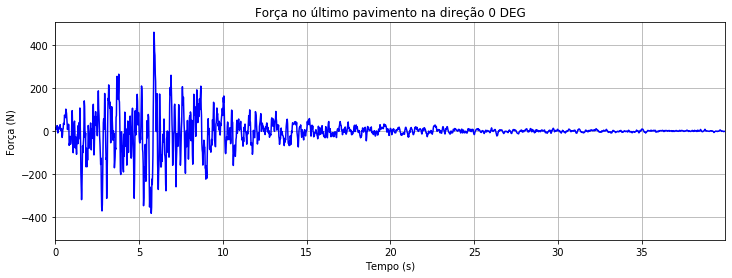

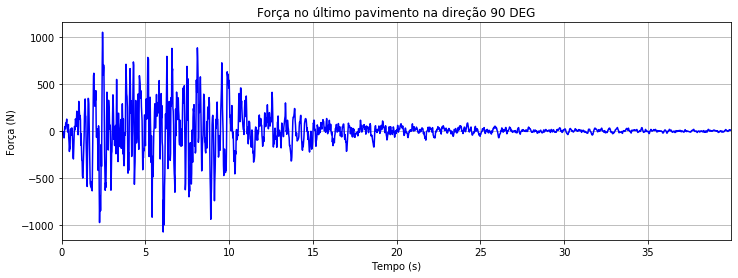

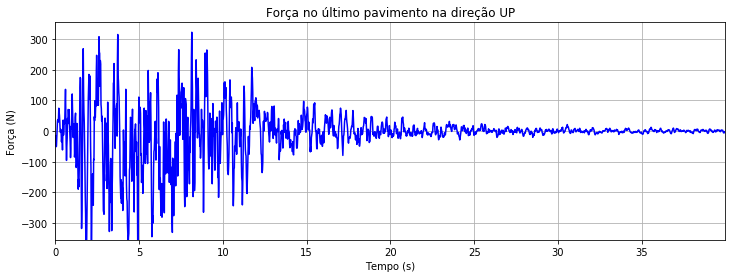

In [4]:
#################################
###      CARGAS DE SISMO      ###
#################################

# Os arquivos de entrada de dados estão em cm/s/s. É necessário converter pra m/s/s

# Obtendo a carga de sismo artificial

comp_0 = pd.read_excel('sismo_artificial_comp0.xlsx').to_numpy().T
comp_90 = pd.read_excel('sismo_artificial_comp90.xlsx').to_numpy().T
up = pd.read_excel('sismo_artificial_up.xlsx').to_numpy().T

col = np.shape(comp_0)[1]
sismo_artificial = np.zeros((3,col))

sismo_artificial[0,:] = np.copy(comp_0)
sismo_artificial[1,:] = np.copy(comp_90)
sismo_artificial[2,:] = np.copy(up)

sismo_artificial /= 100

F = dyn.Seismic3D('forca_sismo_artificial',Mr,sismo_artificial,t)

In [5]:
##################################################
###             ENTRADA DE DADOS               ###
##################################################

t = np.linspace(0,39.98,num=2000)

u0 = np.zeros((np.shape(Mr)[0],1))
v0 = np.zeros((np.shape(Mr)[0],1))

##################################################
###          MATRIZ DE AMORTECIMENTO           ###
##################################################

Cr = dyn.damping_matrix(wk[1], wk[3], 0.01, 0.01, Mr, Kr)

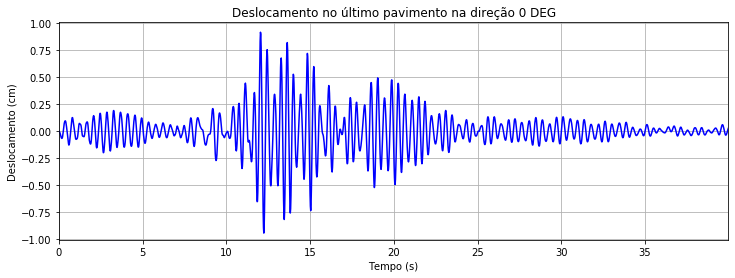

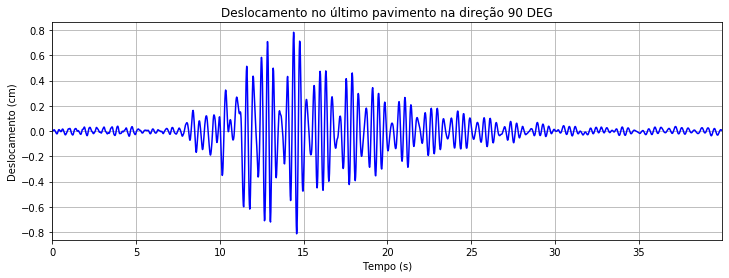

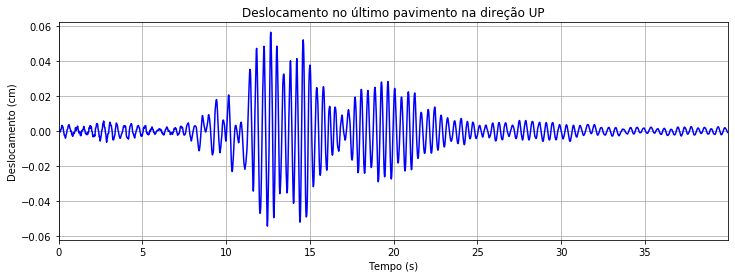

In [6]:
##################################################
###   RESOLUÇÃO DO PROBLEMA PARA SISMO REAL    ###
##################################################

F_real = pd.read_excel('forca_sismo_real.xlsx').to_numpy()

u_real, v_real, a_real = dyn.Newmark('real',Kr,Mr,Cr,F_real,u0,v0,t)

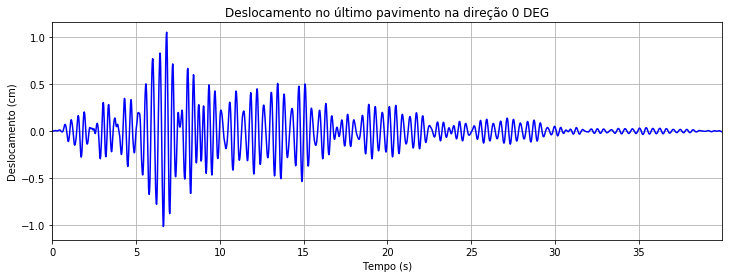

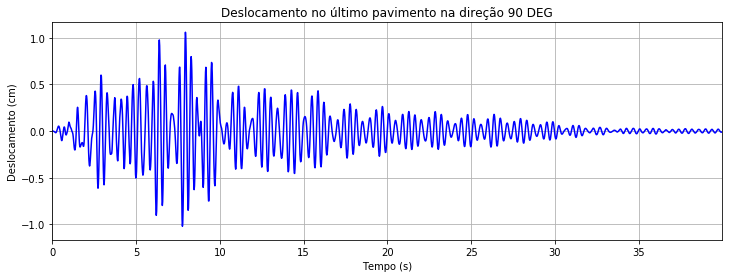

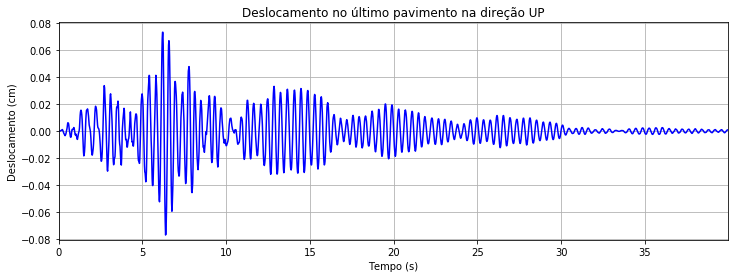

In [7]:
###################################################
### RESOLUÇÃO DO PROBLEMA PARA SISMO ARTIFICIAL ###
###################################################

F_artificial = pd.read_excel('forca_sismo_artificial.xlsx').to_numpy()

u_artificial, v_artificial, a_artificial = dyn.Newmark('artificial',Kr,Mr,Cr,F_artificial,u0,v0,t)